In [7]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Loading data
file_path = Path("data/myopia.csv")
df = pd.read_csv(file_path)
df.head(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
X = df.iloc[:,:-1].copy()
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standarize data with StandarScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


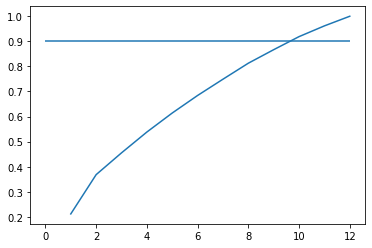

In [8]:
variance_explained = np.arange(0.1, 1.0, 0.01)
components =[]
sum_components=[]
for i in variance_explained:
    
    # Initialize PCA model
    pca = PCA(n_components=i)
    
    # Get two principal components.
    X_pca = pca.fit_transform(X_scaled)
    
    # variance explained
    sum_components.append(pca.explained_variance_ratio_.sum())
    
    # number of principle components
    components.append(len(pca.explained_variance_ratio_))
    
plt.plot(components, sum_components)
plt.hlines(0.9,0,12)

In [9]:
 # Initialize PCA model components explaining about 90% variance
pca = PCA(n_components=10)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915182

In [10]:
# Note shorter method by setting desired variance explained
pca = PCA(n_components=0.9)
    
# Get two principal components.
X_pca = pca.fit_transform(X_scaled)
    
# variance explained
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [11]:
# shows all 10 components and the significance of each feature on the principle component
print(abs( pca.components_ ))

[[0.29943632 0.23557685 0.43385722 0.27187928 0.25484995 0.40919082
  0.15331623 0.22308667 0.18663053 0.29236309 0.1563252  0.37626239
  0.02394087 0.01185764]
 [0.07481307 0.11938336 0.35512084 0.25319434 0.29488801 0.34420164
  0.10224397 0.37276848 0.19939742 0.32330593 0.19567693 0.49394049
  0.09060117 0.01809029]
 [0.3506736  0.40509421 0.00643243 0.08335354 0.20551571 0.07010645
  0.03622729 0.06300538 0.32831163 0.27207587 0.3321881  0.09468094
  0.46534578 0.36855107]
 [0.20353427 0.25013004 0.16025233 0.27364109 0.05843494 0.24531693
  0.3593369  0.24378383 0.12699022 0.22803386 0.55515987 0.01192807
  0.24632419 0.32581218]
 [0.14001235 0.22259312 0.01825806 0.01907683 0.06622854 0.01021455
  0.49684808 0.23144361 0.44488078 0.06996406 0.01023069 0.06211932
  0.38639791 0.5188026 ]
 [0.09378621 0.23274007 0.00390664 0.02481619 0.21771477 0.05540828
  0.25380717 0.14824775 0.53017338 0.03413053 0.12469642 0.05840542
  0.50579132 0.49244885]
 [0.26090403 0.22628402 0.23587232

In [12]:
# Transform PCA data to a DataFrame
df_X_pca = pd.DataFrame(
    data=X_pca, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"]
)
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


## K-Means

In [13]:
from sklearn.cluster import KMeans

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


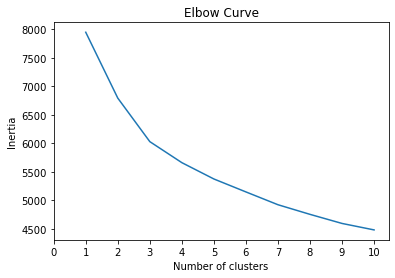

In [14]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_X_pca)

# Predict clusters
predictions = model.predict(df_X_pca)

# Add the predicted class column to the dataframe
df_X_pca["class"] = model.labels_
df_X_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


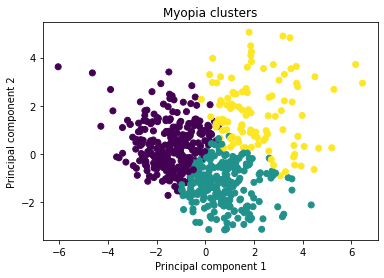

In [16]:
# Visualize the clusters
# only choosing 2 of the 10 components
plt.scatter(x=df_X_pca['pc1'], y=df_X_pca['pc2'], c=df_X_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

In [17]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [18]:
df['group'] = df_X_pca['class']

In [19]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,group
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,1


In [21]:
df[df['group']==2].describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,group
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.0
mean,6.981651,0.552495,22.641651,3.616651,3.531560,15.493578,14.137615,6.146789,4.477064,4.394495,11.348624,51.926606,0.504587,0.486239,0.174312,2.0
std,1.009048,0.542466,0.576306,0.205440,0.142087,0.564518,7.988960,3.924816,5.236263,3.437318,5.871110,14.996732,0.502288,0.502119,0.381130,0.0
min,5.000000,-0.699000,21.280001,3.102000,3.168000,14.320000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,2.0
25%,6.000000,0.231000,22.230000,3.490000,3.440000,15.100000,9.000000,4.000000,0.000000,2.000000,7.000000,41.000000,0.000000,0.000000,0.000000,2.0
50%,7.000000,0.596000,22.570000,3.636000,3.540000,15.410000,14.000000,5.000000,3.000000,4.000000,10.000000,47.000000,1.000000,0.000000,0.000000,2.0
75%,8.000000,0.807000,23.059999,3.730000,3.626000,15.860000,20.000000,9.000000,7.000000,5.000000,14.000000,62.000000,1.000000,1.000000,0.000000,2.0
max,9.000000,3.731000,24.559999,4.224000,3.894000,17.299999,35.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000,2.0


In [22]:
df[df['group']==2]["MYOPIC"].value_counts()

0    90
1    19
Name: MYOPIC, dtype: int64

In [24]:
df[df['group']==1].describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,group
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0
mean,6.285106,0.654477,23.043787,3.679153,3.459940,15.904596,12.370213,1.889362,1.753191,0.902128,9.063830,20.944681,0.523404,0.497872,0.140426,1.0
std,0.619822,0.459611,0.450135,0.212931,0.131551,0.465670,8.251079,2.188864,2.140059,1.114682,5.764629,9.293477,0.500518,0.501063,0.348170,0.0
min,5.000000,-0.600000,22.020000,2.972000,2.960000,14.800000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.0
25%,6.000000,0.358500,22.719999,3.537000,3.378000,15.600000,6.000000,0.000000,0.000000,0.000000,5.000000,15.000000,0.000000,0.000000,0.000000,1.0
50%,6.000000,0.645000,22.980000,3.688000,3.454000,15.870000,10.000000,1.000000,1.000000,1.000000,8.000000,20.000000,1.000000,0.000000,0.000000,1.0
75%,6.000000,0.896500,23.335000,3.834000,3.542000,16.219999,16.500000,3.000000,2.000000,1.000000,12.000000,27.000000,1.000000,1.000000,0.000000,1.0
max,9.000000,2.688000,24.500000,4.250000,3.794000,17.170000,41.000000,12.000000,12.000000,6.000000,30.000000,49.000000,1.000000,1.000000,1.000000,1.0


In [26]:
df[df['group']==1]["MYOPIC"].value_counts()

0    202
1     33
Name: MYOPIC, dtype: int64

In [27]:
df[df['group']==0].describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,group
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.0
mean,6.040146,1.025547,21.970000,3.477288,3.615299,14.877628,10.726277,2.240876,1.463504,0.839416,7.894161,20.062044,0.492701,0.503650,0.105839,0.0
std,0.404002,0.703004,0.442678,0.211719,0.141103,0.435593,7.505424,2.361242,1.890922,1.127307,5.326666,9.596998,0.500862,0.500902,0.308195,0.0
min,5.000000,-0.524000,19.900000,2.772000,3.224000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,6.000000,0.655250,21.702500,3.344500,3.524500,14.562500,5.000000,0.000000,0.000000,0.000000,4.000000,13.000000,0.000000,0.000000,0.000000,0.0
50%,6.000000,0.891000,22.025001,3.470000,3.626000,14.930000,10.000000,2.000000,1.000000,1.000000,7.000000,19.000000,0.000000,1.000000,0.000000,0.0
75%,6.000000,1.306750,22.290001,3.622000,3.710000,15.170000,15.000000,4.000000,2.000000,1.000000,10.000000,26.000000,1.000000,1.000000,0.000000,0.0
max,8.000000,4.372000,22.809999,4.102000,4.112000,15.850000,45.000000,11.000000,10.000000,8.000000,30.000000,45.000000,1.000000,1.000000,1.000000,0.0


In [28]:
df[df['group']==0]["MYOPIC"].value_counts()

0    245
1     29
Name: MYOPIC, dtype: int64